<a href="https://colab.research.google.com/github/Hubobv/AI_W4/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_AI_W4_25_02_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install skfuzzy
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=9e5220729add502e0597584833badeaf1a98c838bc926e49fa40acd223b6b106
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


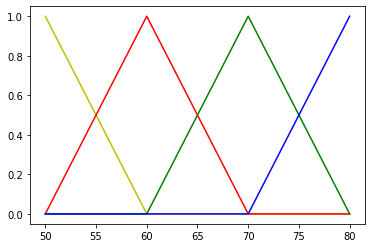

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(50,81,1)
#tao cac hinh tam giac
slow=fuzz.trimf(x,[50,50,60])
medium=fuzz.trimf(x,[50,60,70])
medium_fast=fuzz.trimf(x,[60,70,80])
full_speed=fuzz.trimf(x,[70,80,80])
#ve do thi
plt.plot(x,slow,"y",linewidth=1.5,label="slow")
plt.plot(x,medium,"r",linewidth=1.5,label="medium")
plt.plot(x,medium_fast,"g",linewidth=1.5,label="medium_fast")
plt.plot(x,full_speed,"b",linewidth=1.5,label="full speed")

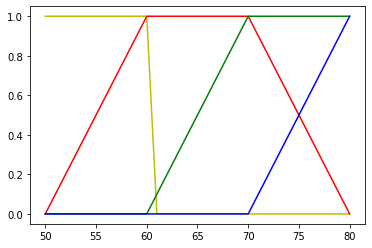

In [ ]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(50,81,1)
#tao hinh thang
slow=fuzz.trapmf(x,[50,50,60,60])
medium=fuzz.trapmf(x,[50,60,70,80])
medium_fast=fuzz.trapmf(x,[60,70,80,80])
full_speed=fuzz.trapmf(x,[70,80,80,80])
plt.plot(x,slow,"y",linewidth=1.5,label="slow")
plt.plot(x,medium,"r",linewidth=1.5,label="medium")
plt.plot(x,medium_fast,"g",linewidth=1.5,label="medium_fast")
plt.plot(x,full_speed,"b",linewidth=1.5,label="full speed")

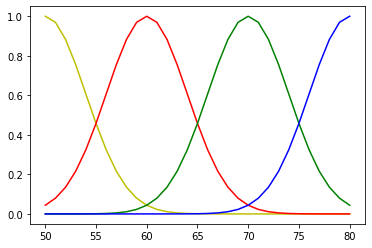

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(50,81,1)
#tao parabol
slow=fuzz.gaussmf(x,50,4)
medium=fuzz.gaussmf(x,60,4)
medium_fast=fuzz.gaussmf(x,70,4)
full_speed=fuzz.gaussmf(x,80,4)
plt.plot(x,slow,"y",linewidth=1.5,label="slow")
plt.plot(x,medium,"r",linewidth=1.5,label="medium")
plt.plot(x,medium_fast,"g",linewidth=1.5,label="medium_fast")
plt.plot(x,full_speed,"b",linewidth=1.5,label="full speed")

25.72307692307692


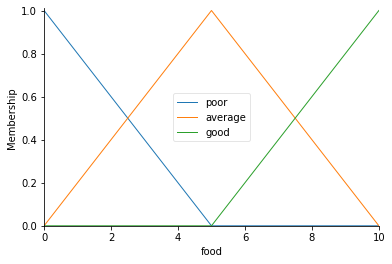

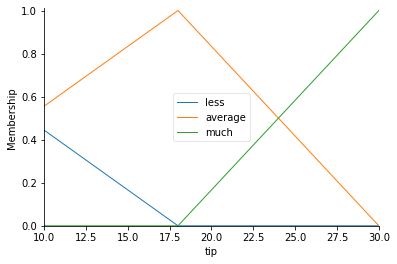

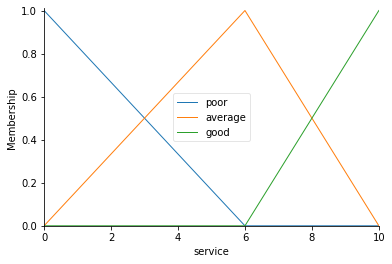

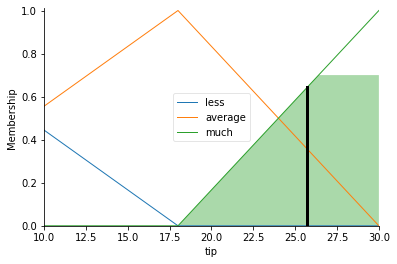

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#Antecedent: bien vao
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
#Consequent: bien ra
tip = ctrl.Consequent(np.arange(10,31,1),'tip')
#Universe: lay arange dem xuong
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,6])
service['average']=fuzz.trimf(service.universe,[0,6,10])
service['good']=fuzz.trimf(service.universe,[6,10,10])
tip['less']=fuzz.trimf(tip.universe,[0,0,18])
tip['average']=fuzz.trimf(tip.universe,[0,18,30])
tip['much']=fuzz.trimf(tip.universe,[18,30,30])
food.view()
tip.view()
service.view()

rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['less'])

rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['average'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['much'])

rule7 = ctrl.Rule(food['good']&service['poor'],tip['less'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['average'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])

#Cho may hoc
tipping_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food']=6.5
tipping.input['service']=19.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

76.66666666666673


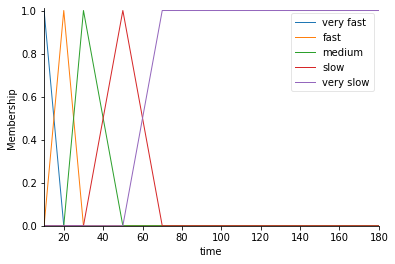

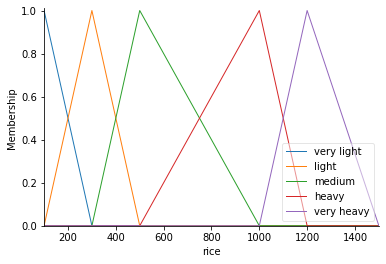

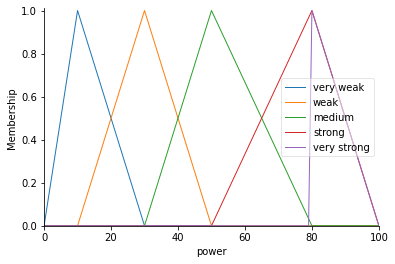

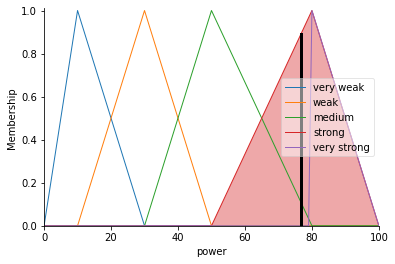

In [10]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#Antecedent: bien vao
time = ctrl.Antecedent(np.arange(10,181,1),'time')
rice = ctrl.Antecedent(np.arange(100,1501,1),'rice')
#Consequent: bien ra
power = ctrl.Consequent(np.arange(0,101,1),'power')
#Universe: lay arange dem xuong
time['very fast'] = fuzz.trimf(time.universe,[10,10,20])
time['fast'] = fuzz.trimf(time.universe,[10,20,30])
time['medium'] = fuzz.trimf(time.universe,[20,30,50])
time['slow'] = fuzz.trimf(time.universe,[30,50,70])
time['very slow'] = fuzz.trapmf(time.universe,[50,70,180,180])

rice['very light'] = fuzz.trimf(rice.universe,[100,100,300])
rice['light'] = fuzz.trimf(rice.universe,[100,300,500])
rice['medium'] = fuzz.trimf(rice.universe,[300,500,1000])
rice['heavy'] = fuzz.trimf(rice.universe,[500,1000,1200])
rice['very heavy'] = fuzz.trimf(rice.universe,[1000,1200,1500])

power['very weak']=fuzz.trimf(power.universe,[0,10,30])
power['weak']=fuzz.trimf(power.universe,[10,30,50])
power['medium']=fuzz.trimf(power.universe,[30,50,80])
power['strong']=fuzz.trimf(power.universe,[50,80,100])
power['very strong']=fuzz.trimf(power.universe,[80,80,100])

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['very fast']&rice['very light'],power['medium'])
rule2 = ctrl.Rule(time['fast']&rice['very light'],power['medium'])
rule3 = ctrl.Rule(time['medium']&rice['very light'],power['medium'])
rule4 = ctrl.Rule(time['slow']&rice['very light'],power['weak'])
rule5 = ctrl.Rule(time['very slow']&rice['very light'],power['very weak'])

rule6 = ctrl.Rule(time['very fast']&rice['light'],power['strong'])
rule7 = ctrl.Rule(time['fast']&rice['light'],power['strong'])
rule8 = ctrl.Rule(time['medium']&rice['light'],power['medium'])
rule9 = ctrl.Rule(time['slow']&rice['light'],power['medium'])
rule10 = ctrl.Rule(time['very slow']&rice['light'],power['weak'])

rule11 = ctrl.Rule(time['very fast']&rice['medium'],power['very strong'])
rule12 = ctrl.Rule(time['fast']&rice['medium'],power['strong'])
rule13 = ctrl.Rule(time['medium']&rice['medium'],power['strong'])
rule14 = ctrl.Rule(time['slow']&rice['medium'],power['medium'])
rule15 = ctrl.Rule(time['very slow']&rice['medium'],power['weak'])

rule16 = ctrl.Rule(time['very fast']&rice['heavy'],power['very strong'])
rule17 = ctrl.Rule(time['fast']&rice['heavy'],power['very strong'])
rule18 = ctrl.Rule(time['medium']&rice['heavy'],power['strong'])
rule19 = ctrl.Rule(time['slow']&rice['heavy'],power['medium'])
rule20 = ctrl.Rule(time['very slow']&rice['heavy'],power['weak'])

rule21 = ctrl.Rule(time['very fast']&rice['very heavy'],power['very strong'])
rule22 = ctrl.Rule(time['fast']&rice['very heavy'],power['very strong'])
rule23 = ctrl.Rule(time['medium']&rice['very heavy'],power['strong'])
rule24 = ctrl.Rule(time['slow']&rice['very heavy'],power['strong'])
rule25 = ctrl.Rule(time['very slow']&rice['very heavy'],power['medium'])

#Cho may hoc
power_ctrl= ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)

powering.input['rice']=500
powering.input['time']=30
powering.compute()
print(powering.output['power'])
power.view(sim=powering)